# Question 3

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_1331/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [6]:
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


In [7]:
def detrend(f):
    detrended_xarr = f.groupby(f.month).mean()
    # BEGIN SOLUTION
    detrended_xarr = detrended_xarr - detrended_xarr.mean()
    # END SOLUTION
    return detrended_xarr

dy = data.groupby('year')
c02anomaly = dy.apply(detrend)
display(c02anomaly)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
monthly_anomaly

year  date_index  fraction_date     c02  data_adjusted_season  \
year month                                                                  
1958 3       0.0    -133.875      -0.366825  0.3675                -0.870   
     4       0.0    -102.875      -0.281825  2.1175                -0.140   
     5       0.0     -72.875      -0.199625  2.1775                -0.590   
     7       0.0     -11.875      -0.032525  0.5275                -0.110   
     8       0.0      19.125       0.052375 -0.4025                 0.890   
...          ...         ...            ...     ...                   ...   
2021 1       0.0     -60.000      -0.164380 -2.0180                -0.358   
     2       0.0     -29.000      -0.079480 -0.7180                 0.232   
     3       0.0      -1.000      -0.002780 -0.0480                 0.122   
     4       0.0      30.000       0.082220  1.0520                -0.028   
     5       0.0      60.000       0.164420  1.7320                 0.032   

            data_fit  data_adjusted_seasonally_fit  data_filled  \
year month                                                        
1958 3        0.9375                      -0.32125       0.3675   
     4        2.0475                      -0.24125       2.1175   
     5        2.6075                      -0.16125       2.1775   
     7        0.6075                      -0.00125       0.5275   
     8       -1.2625                       0.06875      -0.4025   
...              ...                           ...          ...   
2021 1       -1.9880                      -0.32800      -2.0180   
     2       -1.0980                      -0.14800      -0.7180   
     3       -0.1680                       0.00200      -0.0480   
     4        1.2520                       0.16200       1.0520   
     5        2.0020                       0.31200       1.7320   

            data_adjusted_seasonally_filed  
year month                                  
1958 3                              -0.870  
     4                              -0.140  
     5                              -0.590  
     7                              -0.110  
     8                               0.890  
...                                    ...  
2021 1                              -0.358  
     2                               0.232  
     3                               0.122  
     4                              -0.028  
     5                               0.032  

[754 rows x 9 columns]

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


### Question 3 [5 points]

Next, recreate the following figure, which is much closer to the one in the lecture:

<img src="figures/annual-anomaly-new.png" width="700px" />

**Hints:** 
- in order to get that smooth curve, you'll need to use `from scipy.interpolate import CubicSpline`. You can find the documentation for `CubicSpline` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html).
- The "Seasonal Anomaly" inset graph can be created with `ax.inset_axes(...)`. You can treat the `Axes` object returned like any other `Axes` object.
- Remember that you can set the tick labels with `ax.set_xticks(...)`.
- To get the data points plotted as red dots, when you use `ax.plot(...)`, pass in `"r."` as the argument immediately following any data you pass in. The `"r"` indicates the color, while the `"."` indicates how the data will be plotted (if you don't put the `"."`, it will be a line instead).

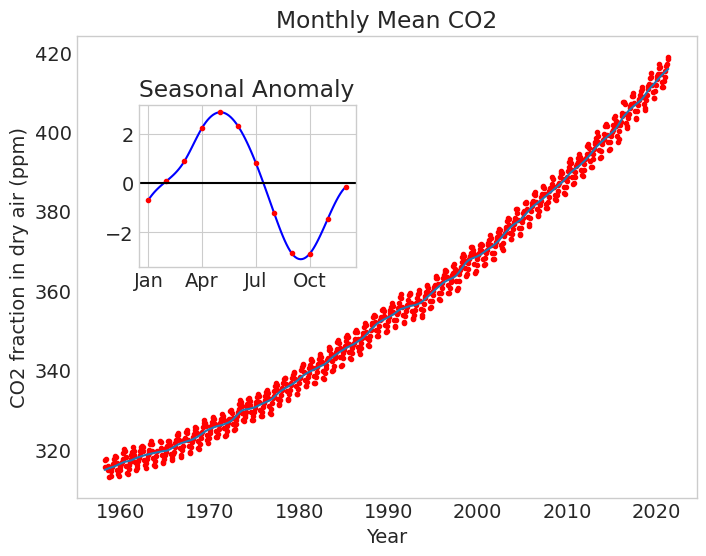

In [8]:
from scipy.interpolate import CubicSpline

# calculate the anual cucle using groupby
annual = data.groupby(data.month).mean()

# calculate the anomaly
anomaly = annual - annual.mean()

# plot
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
cs = CubicSpline(np.arange(1, 13), monthly_anomaly.c02)
xs = np.arange(1, 12.01, 0.1)
axin1.plot(xs, cs(xs), "b")
axin1.plot(np.arange(1,13) , monthly_anomaly.c02, "r.")
axin1.set_xticks([1, 4, 7, 10])
axin1.set_xticklabels(["Jan", "Apr", "Jul", "Oct"])
axin1.axhline(y = 0, color = 'black', linestyle = '-')
axin1.set_title("Seasonal Anomaly");